# Punktpartikkel i 2D

### FY1003 Elektrisitet og Magnetisme - Numerisk Øving 1

Det elektriske felt og potensial for en punktpartikkel er allerede kjent i vilkårlig dimensjon. Hensikten med denne øvingen er å lære hvordan man håndterer numerikk i flere dimensjoner, både mht. de forskjellige metodene som fins for å plotte 2-dimensjonale systemer, og bruk av meshgrids. Det forventes at bruk av 1-dimensjonale arrays er kjent fra tidligere. 

### Oppgave 1: Elektrisk Potensial

Fra Coloumbs lov er det kjent at det elektriske potensialet i 2 dimensjoner en avstand, $r = \sqrt{x^2 + y^2}$, fra en punktpartikkel med ladning $q$ er gitt ved 
\begin{equation}
V(r) = \frac{q}{4\pi \epsilon_0}\frac{1}{r}\text{,}
\end{equation}
hvor $\epsilon_0$ er den elektriske permittivitet i vakum. Første del av øvingen vil gå ut på å plotte dette potensialet for en punktpartikkel med ladning $q = e$ plassert i origo, mellom $\pm L = \pm 10\text{nm}$.

$\textbf{a)}$ Ofte når man jobber med numerikk er det hensiktsmessig å innføre nye dimensjonsløse variabler, f.eks. $v/c$ hvis man jobber med hastigheter nær lysets hastighet, eller $V/V_0$ om man jobber med et konstant potensial. Utfør et slikt variabelskifte på potensialet og posisjonen slik at de blir dimensjonsløse.

------------

$ \frac{V}{V_0} = \frac{r_0}{r} $

----------------

$\textbf{b)}$ For å løse problemer i to dimensjoner er det nødvendig med en ny måte å diskretisere koordinatene. Det er ikke lenger tilstrekkelig med éndimensjonale $1 \times n$ arrays. Vi trenger enten en $n \times n$ array hvor hvert punkt er en 2-dimensjonal vektor, eller en separat $n \times n$ array for hver akse. I denne øvingen skal vi bruke den sistnevnte metoden, ved å bruke $\texttt{numpy} $ s $ \texttt{meshgrid} $ funksjon.

Bruk $\texttt{np.meshgrid}$ til å generere to variabler, $\texttt{xv}$ og $\texttt{yv}$, som inneholder $x$ og $y$ koordinater respektivt.

In [7]:
import numpy as np
import matplotlib as plt

def create_meshgrid(xs: float, ys: float, number_of_elements: int):
    nx = np.linspace(-xs, xs, number_of_elements)
    ny = np.linspace(-ys, ys, number_of_elements)

    return np.meshgrid(nx, ny)


$\textbf{c)}$ Via bruk av array-operasjoner, lag en variabel $\texttt{V}$ som inneholder potensialet $V$ for alle $x$ og $y$. Merk at det her vil oppstå en singularitet i $\vec{r} = 0$ som må tas stilling til. En måte å håndtere dette problemet er å sette verdien for potensialet over en viss grense lik konstant, f.eks. $\texttt{V[}>\texttt{c]} = \texttt{c}$.

In [8]:
def distance(x: np.ndarray, y: np.ndarray) -> np.ndarray:
    return np.sqrt(x**2 + y**2)

def potential(r: np.ndarray) -> np.ndarray:
    limit = 0.05
    r0 = 1 # nm
    r[r<limit] = limit
    return r0/r

def generate_potential_field(meshgrid: list[np.ndarray]) -> np.ndarray:
    xc = meshgrid[0]
    yc = meshgrid[1]
    distances = distance(xc, yc)
    potentials = potential(distances)
    return potentials

r_extreme = 0.4
number_of_elements = 50
grid = create_meshgrid(r_extreme, r_extreme, number_of_elements)
potential_field = generate_potential_field(grid)

        

$\textbf{d)}$ Plot det dimensjonsløse potensialet $V$ både som en heatmap og som en 3d overflate.

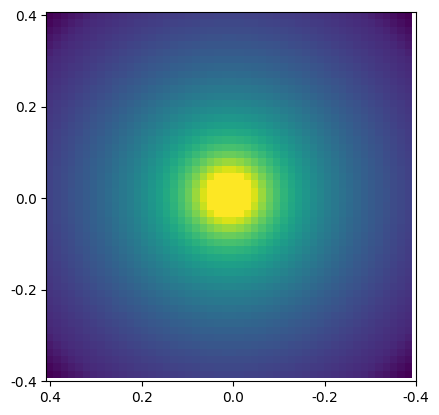

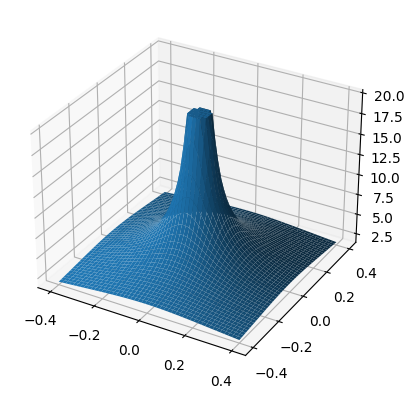

In [9]:
import matplotlib.pyplot as plt

def plot_heatmap(potential_field: np.ndarray, grid: list) -> None:
    plt.imshow(potential_field, norm="symlog")
    length, width = len(potential_field), len(potential_field[0])
    extreme = grid[0][0][0]
    ticks = 5
    plt.xticks(np.linspace(0, width, ticks), labels=np.round(np.linspace(-extreme, extreme, ticks), 2))
    plt.yticks(np.linspace(0, length, ticks), labels=np.round(np.linspace(-extreme, extreme, ticks), 2))
    plt.savefig("Heatmap_potential.png")

def plot_3Dmap(potential_field: np.ndarray, grid: list[np.ndarray]) -> None:
    fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
    ax.plot_surface(grid[0], grid[1], potential_field)
    plt.savefig("3Dmap_potential.png")

plot_heatmap(potential_field, grid)
plot_3Dmap(potential_field, grid)

### Oppgave 2: Elektrisk Felt

Det elektriske felt for en punktpartikkel er også kjent fra Coloumbs lov, men generelt hvis man vet potensialet kan en finne det elektriske feltet ved å bruke gradienten, $\vec{E}=-\nabla V$. I én dimensjon er gradienten kun en vanlig derivert, og vi får $E(r) = -\frac{\text{d}V(r)}{\text{d}r}$. En kan beregne dette numerisk ved å diskretisere derivasjonen,
\begin{equation}
    E(r_\text{i}) = -\frac{V(r_\text{i+1})-V(r_\text{i-1})}{r_\text{i+1}-r_\text{i-1}}\text{.}
\end{equation}
Dette er et eksempel på en finite difference quotient, mer spesifikt er dette en $\textit{central finite difference quotient}$. 

$\textbf{a)}$ Utled en diskret formulering for gradienten i to dimensjoner med bruk av finite difference quotients.

----------------

Skriv her eller på papir

------------------

$\textbf{b)}$ Lag en funksjon som tar inn et potensial $\texttt{V}$ som argument, regner ut gradienten i hvert punkt, og returnerer det elektriske feltet som to $n-2 \times n-2$ arrays (årsaken til at dimensjonen blir $n-2$ og ikke $n$ er at man ikke kan beregne gradienten på randen med central finite differences, men må da bruke enten det som kalles forward/backward finite differences).

$\textit{Hint:}$ Bruk array slicing for å gjøre koden mer effektiv.

In [10]:
def gradient(potential: np.ndarray, step_size: float) -> tuple[np.ndarray, np.ndarray]:
    electric_field_x = (potential[1:-1, 2:] - potential[1:-1, 0:-2]) / step_size
    electric_field_y = (potential[0:-2, 1:-1] - potential[2:, 1:-1]) / step_size
    return electric_field_x, electric_field_y

step_size = r_extreme / number_of_elements
electric_field = gradient(potential_field, step_size)


$\textbf{c)}$ Plot det dimensjonsløse elektriske feltet til en punktpartikkel i to dimensjoner ved bruk av $\texttt{matplotlib}$s $\texttt{quiverplot}$.

996004


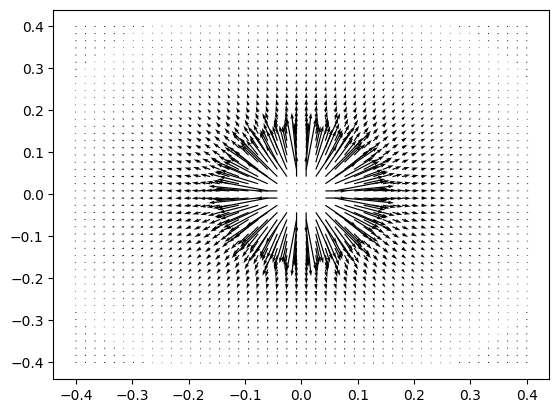

In [11]:
def plot_electric_field(electric_field: tuple, grid: list[np.ndarray]) -> None:
    plt.quiver(*grid, *electric_field)
    plt.savefig("Electric_field.png")

gradient_grid = create_meshgrid(-r_extreme, r_extreme, number_of_elements-2)
plot_electric_field(electric_field, gradient_grid)
print(998*998)